In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from ML2_lib import loss
from ML2_lib import plot_set
from ML2_lib import RV_SGDAve

In [2]:
d = 2
trial_num = 100
lr = 0.1
noise = "lognormal"
c = 1
E_var = 1.75
n = 10000
k_list = [1, 2, 4, 5, 10, 20]
son = loss.Ellipsoid(d=d, noise_type=noise, E_var=E_var)

In [3]:
def sgd_to_ave(x):
    hoge = []
    for i in range(x.shape[0]):
        if i == 0:
            hoge.append(x[0])
        else:
            hoge.append(np.mean(x[0:i+1],axis=0))
    return hoge

In [4]:
def k_sgd_to_ave(k_core_list):
    hoge = []
    for i in k_core_list:
        fuga = []
        for j in i:
            fuga.append(sgd_to_ave(j))
        hoge.append(np.array(fuga))
    return hoge

valid_loss_store [1373976.594795791]
tmp_loss [array([1373976.59479579])]
0
valid_loss_store [2664920.791369518, 1490964.2563875173]
tmp_loss [array([1490964.25638752]), array([1490964.25638752])]
1
valid_loss_store [8648290.144506095, 13817320.894054957, 8397536.179029962, 13733185.10634424]
tmp_loss [array([13733185.10634424]), array([13733185.10634424]), array([13733185.10634424]), array([13733185.10634424])]
2
valid_loss_store [22634878.888030186, 33177411.670081776, 21513889.291695606, 33174792.23456875, 7377534.103542528]
tmp_loss [array([7377534.10354253]), array([7377534.10354253]), array([7377534.10354253]), array([7377534.10354253]), array([7377534.10354253])]
4
valid_loss_store [16194058.522052271, 34486626.821867034, 15095075.276114354, 34381117.411688685, 34468024.62038193, 15086118.138318215, 3743891.706878006, 14929480.714967081, 14880263.792354526, 34974893.89246446]
tmp_loss [array([34974893.89246446]), array([34974893.89246446]), array([34974893.89246446]), array([349

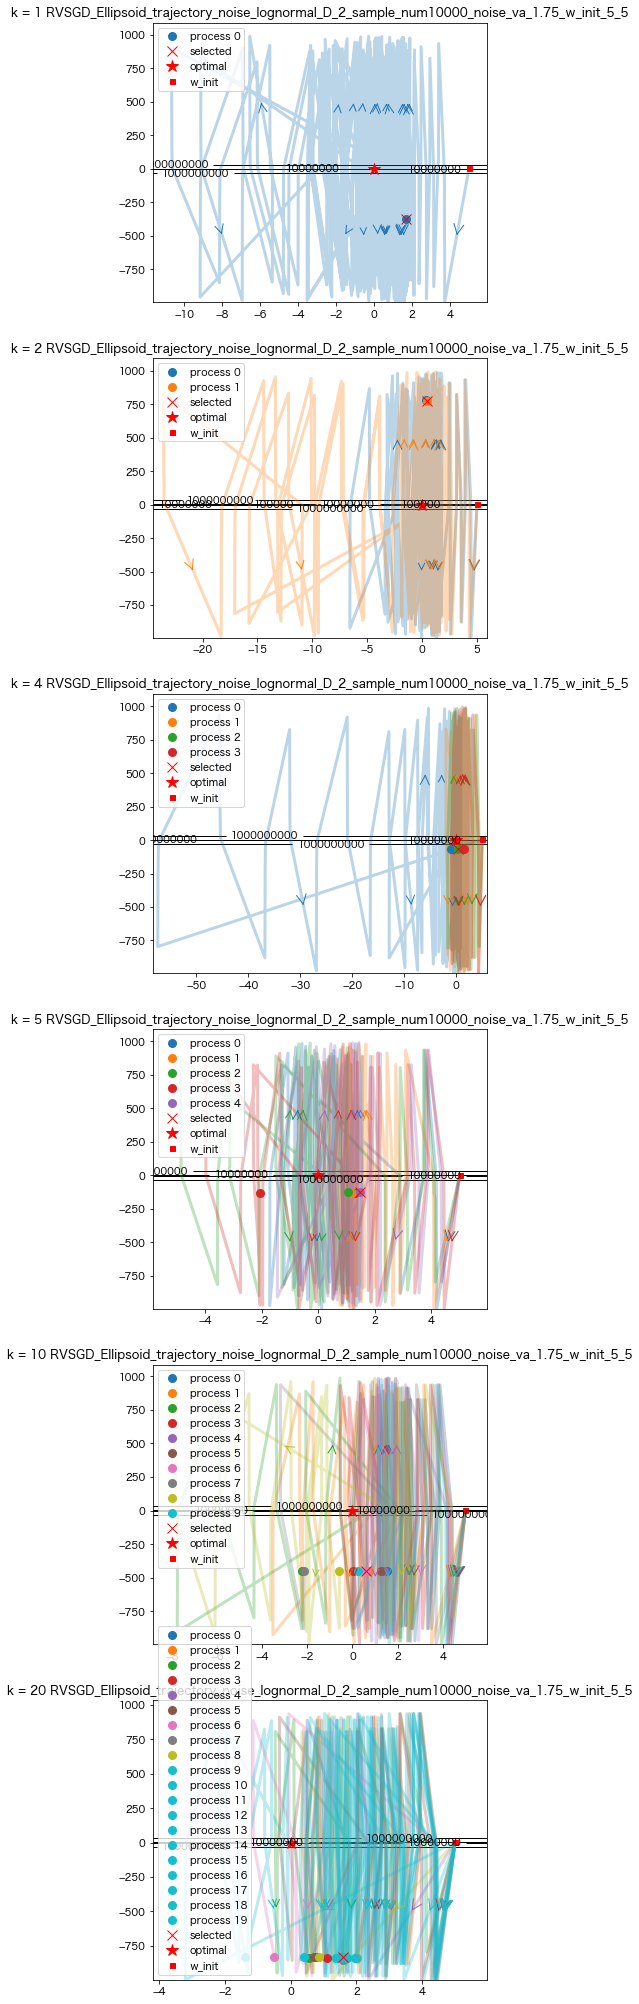

In [5]:
w_init = np.array([5, 5])

title = f"RVSGD_Ellipsoid_trajectory_noise_{noise}_D_{d}_sample_num{n}_noise_va_{E_var}_w_init_{w_init[0]}_{w_init[1]}"
RV = RV_SGDAve.RVSGDByW(model_opt=son, c=1, n=n, lr=lr)
k_core_list, k_selected_index, k_w_rv = RV.k_all_transition(k_list=k_list, w_init=w_init)
plot_set.multiple_w_value_2d_k_candidates_contour(k_list=k_list, k_list_core_store=k_core_list, _t_max=n,
                                                  k_selected_index=k_selected_index, f=son, levels=[10,100000,10000000,1000000000],title=title,saving_png=False)

valid_loss_store [576373.158509555]
tmp_loss [array([576373.15850956])]
0
valid_loss_store [8103251.471875808, 5909730.425786935]
tmp_loss [array([5909730.42578693]), array([5909730.42578693])]
1
valid_loss_store [20139782.417782627, 13856827.712637395, 13836008.820941022, 1708383.0706063174]
tmp_loss [array([1708383.07060632]), array([1708383.07060632]), array([1708383.07060632]), array([1708383.07060632])]
3
valid_loss_store [32886760.066006638, 33019899.5826073, 22447978.67428983, 22446894.022751134, 32792342.11378583]
tmp_loss [array([32792342.11378583]), array([32792342.11378583]), array([32792342.11378583]), array([32792342.11378583]), array([32792342.11378583])]
3
valid_loss_store [34646740.307937, 34483234.584156565, 34701460.296628885, 34640070.08128317, 15029702.680964505, 34549543.64693277, 34947713.13319322, 34221852.65843803, 34709984.36725816, 34664367.787708044]
tmp_loss [array([34664367.78770804]), array([34664367.78770804]), array([34664367.78770804]), array([34664367.

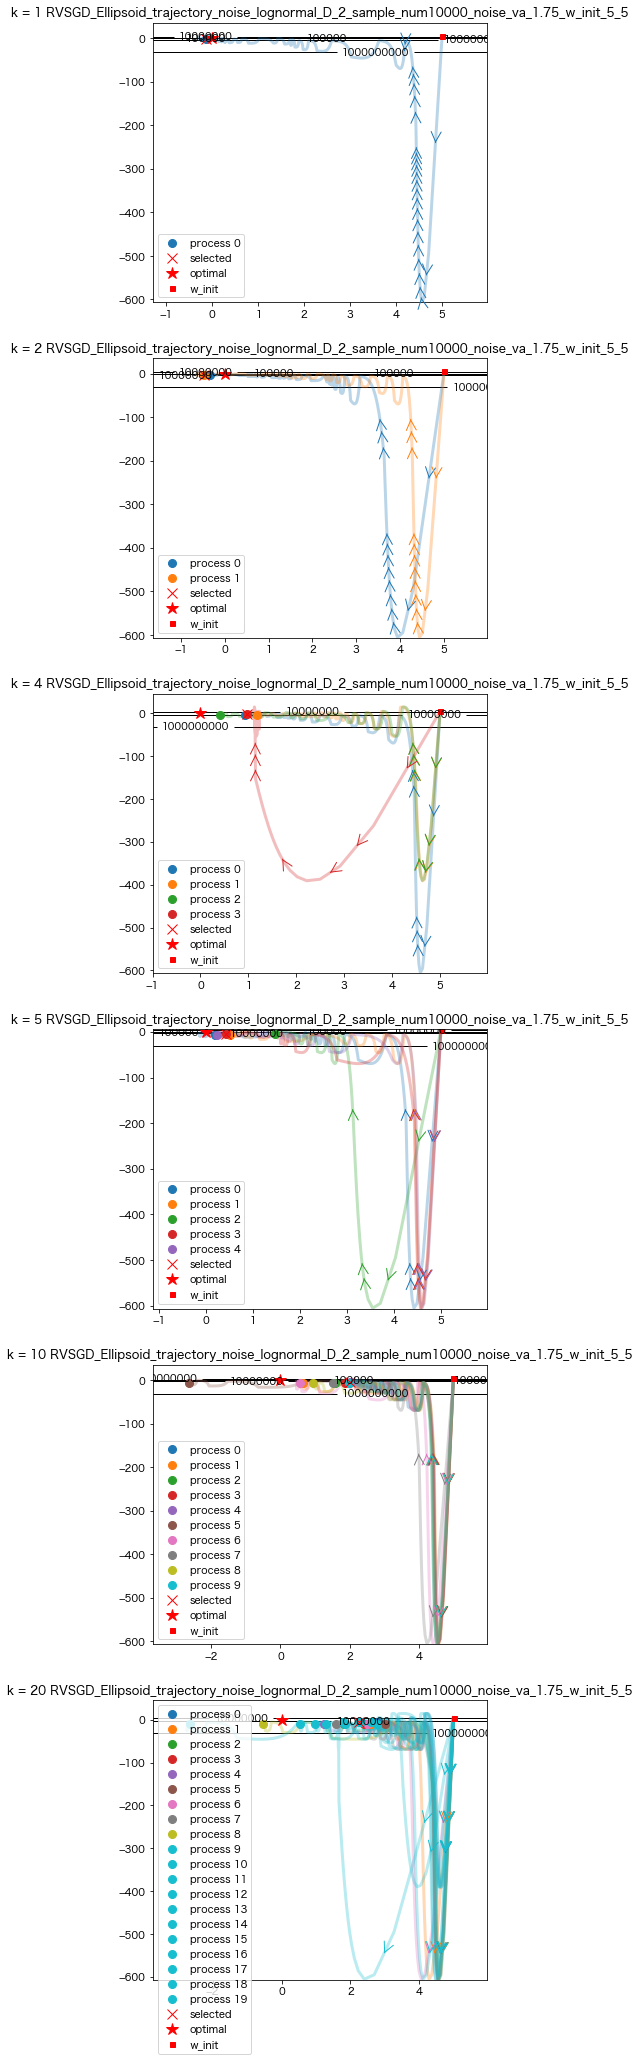

In [13]:
w_init = np.array([5, 5])

title = f"RVSGD_Ellipsoid_trajectory_noise_{noise}_D_{d}_sample_num{n}_noise_va_{E_var}_w_init_{w_init[0]}_{w_init[1]}"
RV = RV_SGDAve.RVSGDByW(model_opt=son, c=1, n=n, lr=lr)
k_core_list, k_selected_index, k_w_rv = RV.k_all_transition(k_list=k_list, w_init=w_init)
k_core_list_ave = k_sgd_to_ave(k_core_list)
plot_set.multiple_w_value_2d_k_candidates_contour(k_list=k_list, k_list_core_store=k_core_list_ave, _t_max=n,
                                                  k_selected_index=k_selected_index, f=son, levels=[10,100000,10000000,1000000000],title=title,saving_png=False)



In [8]:

k_core_list[0][0]

array([[   5.        ,    5.        ],
       [   3.59862655, -994.58535978],
       [   3.59836139, -795.66998531],
       ...,
       [   1.55817233, -616.97026001],
       [   1.55827787, -493.57580907],
       [   1.55835355, -394.86100427]])

In [9]:
np.array(sgd_to_ave(k_core_list[0][0]))

array([[   5.        ,    5.        ],
       [   4.29931328, -494.79267989],
       [   4.06566265, -595.08511503],
       ...,
       [   0.79635267,   -0.67623609],
       [   0.79650508,   -0.77483573],
       [   0.79665745,   -0.85365296]])

In [10]:

np.mean(k_core_list[0],axis=1)

array([[ 0.79665745, -0.85365296]])

In [11]:
hoge = np.arange(24).reshape((2,3,4))

In [12]:
np.mean(hoge,axis=0)


array([[ 6.,  7.,  8.,  9.],
       [10., 11., 12., 13.],
       [14., 15., 16., 17.]])